In [1]:
#load libraries
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sctoolbox.utilities as utils
import sctoolbox.tools as tools
import sctoolbox.plotting as pl

Unable to determine R home: [Errno 2] No such file or directory: 'R'


In [2]:
#count for values > threshold
def count_non_zero(group, threshold):
    return (group > threshold).sum()

In [3]:
#calculate dot sizes function (mode: count)
def calculate_dot_sizes_from_count(values, min_size, max_size, min_global, max_global, scale_type='linear'):
    # Handle negative or zero values for logarithmic scaling by shifting the series
    if scale_type == 'log':
        values = values - min_global + 1

    # Normalize values to [0, 1] range
    normalized = (values - min_global) / (max_global - min_global)

    if scale_type == 'log':
        # Apply logarithmic scaling
        normalized = np.log1p(normalized)

    # Scale to [min_size, max_size] range
    sizes = normalized * (max_size - min_size) + min_size

    return sizes

In [4]:
#calculate dot sizes function (mode: percentage)
def calculate_dot_sizes_0to100(percentage_values, min_size, max_size):
    sizes = (percentage_values/100) * (max_size - min_size) + min_size
    return sizes

In [5]:
#calculate plot size
def calculate_figure_size_planet(x_range, y_range, max_size, dot_scale):
    width = x_range*(3*max_size)*dot_scale
    height = y_range*(3*max_size)*dot_scale
    return width, height

In [6]:
def calculate_figure_size_mean(x_range, y_range, max_size, dot_scale):
    width = x_range*(1.5*max_size)*dot_scale
    height = y_range*(1.5*max_size)*dot_scale
    return width, height

In [7]:
#load adata
adata = utils.load_h5ad("../../downloads/all-snRNA.h5ad")

[INFO] The adata object was loaded from: ../../downloads/all-snRNA.h5ad


In [8]:
adata.obs

,sample,n_counts,n_genes,percent_mito,doublet_score,dissociation_score,cell_type_original,patient_region_id,donor_id,patient_group,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,2598.0,1678,0.115473,0.000324,0.137064,Fibroblast,control_P1,P1,myogenic,...,tissue,fibroblast of cardiac tissue,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,ncLQ^>4V~0
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,13003.0,4187,0.053834,0.003417,-0.006482,Cardiomyocyte,control_P1,P1,myogenic,...,tissue,cardiac muscle myoblast,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,OIH`^@&ZXS
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,6365.0,2700,0.047133,0.032239,0.005020,Cardiomyocyte,control_P1,P1,myogenic,...,tissue,cardiac muscle myoblast,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,e8Qt8qYxVF
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,627.0,519,0.000000,0.000365,0.087506,Fibroblast,control_P1,P1,myogenic,...,tissue,fibroblast of cardiac tissue,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,0SKw_<k7u@
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,4488.0,1999,0.155971,0.004785,-0.001798,Cardiomyocyte,control_P1,P1,myogenic,...,tissue,cardiac muscle myoblast,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,B)sH)`nDwH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCATGGTCTTGCTC-1,CK376,1153.0,940,0.000000,0.521381,0.066911,Fibroblast,IZ_P16,P16,ischemic,...,tissue,fibroblast of cardiac tissue,10x 3' v3,myocardial infarction,Homo sapiens,male,heart left ventricle,European,66-year-old human stage,sQ@-q!5@uO
TTTCCTCAGGTTCATC-1,CK376,657.0,570,0.456621,0.006264,0.019443,Lymphoid,IZ_P16,P16,ischemic,...,tissue,lymphoid lineage restricted progenitor cell,10x 3' v3,myocardial infarction,Homo sapiens,male,heart left ventricle,European,66-year-old human stage,^KI8(5r80@
TTTCGATTCCGGTAAT-1,CK376,808.0,673,0.000000,0.001830,0.104566,Myeloid,IZ_P16,P16,ischemic,...,tissue,immature innate lymphoid cell,10x 3' v3,myocardial infarction,Homo sapiens,male,heart left ventricle,European,66-year-old human stage,upGc?V#Y@~
TTTGACTTCGCCAACG-1,CK376,862.0,717,0.232019,0.013721,0.024106,Endothelial,IZ_P16,P16,ischemic,...,tissue,cardiac endothelial cell,10x 3' v3,myocardial infarction,Homo sapiens,male,heart left ventricle,European,66-year-old human stage,URA;I!G2Ye


In [9]:
adata.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
feature_id,,,,,
ENSG00000177613,False,CSTF2T,NCBITaxon:9606,gene,4110
ENSG00000128918,False,ALDH1A2,NCBITaxon:9606,gene,8127
ENSG00000143977,False,SNRPG,NCBITaxon:9606,gene,1764
ENSG00000196177,False,ACADSB,NCBITaxon:9606,gene,6234
ENSG00000244482,False,LILRA6,NCBITaxon:9606,gene,2718
...,...,...,...,...,...
ENSG00000179152,False,TCAIM,NCBITaxon:9606,gene,8743
ENSG00000248174,False,LINC02268,NCBITaxon:9606,gene,3422
ENSG00000249875,False,RP11-51M24.1,NCBITaxon:9606,gene,366


In [10]:
#Init Params:

dot_scale = 1/72
max_size = 30
min_size = 3
line_width = 1

#legend dimensions:
legend_color_height = 0.2
legend_color_width = 2
legend_dot_height = 2.5
legend_dot_width = 2
legend_planet_height = 2
legend_planet_width = 2

#planet details
planet_x = [0,-0.866,-0.866,0,0.866,0.866]
planet_y = [1,0.5,-0.5,-1,-0.5,0.5]
planet_text = [{'va': 'bottom'},{'ha': 'right', 'va': 'bottom'},{'ha': 'right', 'va': 'top'},{'va': 'top'},{'ha': 'left', 'va': 'top'},{'ha': 'left', 'va': 'bottom'}]

In [11]:
#passed parameters:

genes = ['FLT1', 'EGR3', 'KDR', 'PGF', 'VEGFB', 'ADAM17']
x_col = "disease"
y_col = "cell_type_original"
expression_threshold = 0

#mode = 'mean' or 'planet'
mode = 'planet'
#size_value = 'count' or 'percentage'
size_value = 'count'
#color_value = 'expression' or 'percentage_max_expression'
color_value = 'percentage_max_expression'

In [12]:
if isinstance(genes, str):
        genes = [genes]

In [13]:
#get the genex values from the adata
df_all = sc.get.obs_df(adata, [*genes, x_col, y_col], gene_symbols= 'feature_name')
df_all

,FLT1,EGR3,KDR,PGF,VEGFB,ADAM17,disease,cell_type_original
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,0.000000,0.0,1.578796,0.000000,0.000000,0.0,normal,Fibroblast
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,0.000000,0.0,0.000000,0.570445,0.000000,0.0,normal,Cardiomyocyte
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,0.944331,0.0,0.000000,0.000000,0.944331,0.0,normal,Cardiomyocyte
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,0.000000,0.0,0.000000,0.000000,0.000000,0.0,normal,Fibroblast
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,0.000000,0.0,0.000000,0.000000,0.000000,0.0,normal,Cardiomyocyte
...,...,...,...,...,...,...,...,...
TTTCATGGTCTTGCTC-1,0.000000,0.0,0.000000,0.000000,0.000000,0.0,myocardial infarction,Fibroblast
TTTCCTCAGGTTCATC-1,0.000000,0.0,0.000000,0.000000,0.000000,0.0,myocardial infarction,Lymphoid
TTTCGATTCCGGTAAT-1,0.000000,0.0,0.000000,0.000000,0.000000,0.0,myocardial infarction,Myeloid
TTTGACTTCGCCAACG-1,2.533771,0.0,0.000000,0.000000,0.000000,0.0,myocardial infarction,Endothelial


In [14]:
#get the count from the adata
df_counts = sc.get.obs_df(adata, [x_col, y_col])
df_counts = df_counts.groupby([x_col, y_col]).size().reset_index(name='count')
df_counts

/tmp/ipykernel_237231/147517762.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_counts = df_counts.groupby([x_col, y_col]).size().reset_index(name='count')


,disease,cell_type_original,count
0,myocardial infarction,Adipocyte,508
1,myocardial infarction,Cardiomyocyte,46200
2,myocardial infarction,Cycling cells,2757
3,myocardial infarction,Endothelial,26509
4,myocardial infarction,Fibroblast,37857
5,myocardial infarction,Lymphoid,4537
6,myocardial infarction,Mast,569
7,myocardial infarction,Myeloid,17927
8,myocardial infarction,Neuronal,1860
9,myocardial infarction,Pericyte,9083


In [15]:
#get the count of the expressed
df_expressed_counts = df_all.groupby([x_col, y_col]).apply(lambda x: count_non_zero(x[genes], expression_threshold)).reset_index()

/tmp/ipykernel_237231/2760209880.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_expressed_counts = df_all.groupby([x_col, y_col]).apply(lambda x: count_non_zero(x[genes], expression_threshold)).reset_index()
/tmp/ipykernel_237231/2760209880.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_expressed_counts = df_all.groupby([x_col, y_col]).apply(lambda x: count_non_zero(x[genes], expression_threshold)).reset_index()


In [16]:
#min / max cell count observed
min_global_cell_count = min(min(df_counts['count']), np.min(df_expressed_counts[genes]))
max_global_cell_count = max(max(df_counts['count']), np.max(df_expressed_counts[genes]))

In [17]:
#get mean expressions  (mode: mean)
df_mean_expressions = df_all.groupby([x_col, y_col]).mean().reset_index()

/tmp/ipykernel_237231/843948801.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean_expressions = df_all.groupby([x_col, y_col]).mean().reset_index()


In [18]:
#vmin and vmax of expression for the colourbar (mode planet, expression)
vmin = np.min(df_mean_expressions[genes])
vmax = np.max(df_mean_expressions[genes])

In [19]:
#merge the dataframes. Note that after merging, the 'genename_x' is the gene count , whereas 'genename_y' is the gene expression.
plot_vars = pd.merge(df_counts, df_expressed_counts, on=[x_col, y_col])
plot_vars = pd.merge(plot_vars, df_mean_expressions, on=[x_col, y_col])

In [20]:
#calculate expression weighted counts mean, mean expression, percentage expressed (mode: mean, count, percentage)
cols_set1 = [col + '_x' for col in genes]
cols_set2 = [col + '_y' for col in genes]

plot_vars['expression_weighted_counts'] = sum(plot_vars[col1] * plot_vars[col2] for col1, col2 in zip(cols_set1, cols_set2))/sum(plot_vars[col2] for col2 in cols_set2)
plot_vars['mean_expression'] = sum(plot_vars[col2] for col2 in cols_set2)/len(cols_set2)
plot_vars['percentage_expressed'] = plot_vars['expression_weighted_counts']*100/plot_vars['count']
plot_vars['percentage_max_expression'] = plot_vars['mean_expression']*100/np.max(plot_vars['mean_expression'])

In [21]:
#calculate percentage expressed and percentage max expression observed for each gene (mode: planet, percentage)
for gene in genes:
    plot_vars[gene+'_percentage_expressed'] = plot_vars[gene+'_x']*100/plot_vars['count']
    plot_vars[gene+'_percentage_max_expression'] = plot_vars[gene+'_y']*100/np.max(plot_vars[gene+'_y'])

In [22]:
#define outer circle size (mode: count)
plot_vars['outer_size'] = calculate_dot_sizes_from_count(plot_vars['count'], min_size, max_size, min_global_cell_count, max_global_cell_count, 'linear')

In [23]:
#define inner dot size (mode: count)
plot_vars['inner_size'] = calculate_dot_sizes_from_count(plot_vars['expression_weighted_counts'], min_size, max_size, min_global_cell_count, max_global_cell_count, 'linear')

In [24]:
#define gene dot size (mode: count)
for gene in genes:
    plot_vars[gene+'_dot_size'] = calculate_dot_sizes_from_count(plot_vars[gene+'_x'], min_size, max_size, min_global_cell_count, max_global_cell_count, 'linear')

Text(0.5, 0, 'disease')

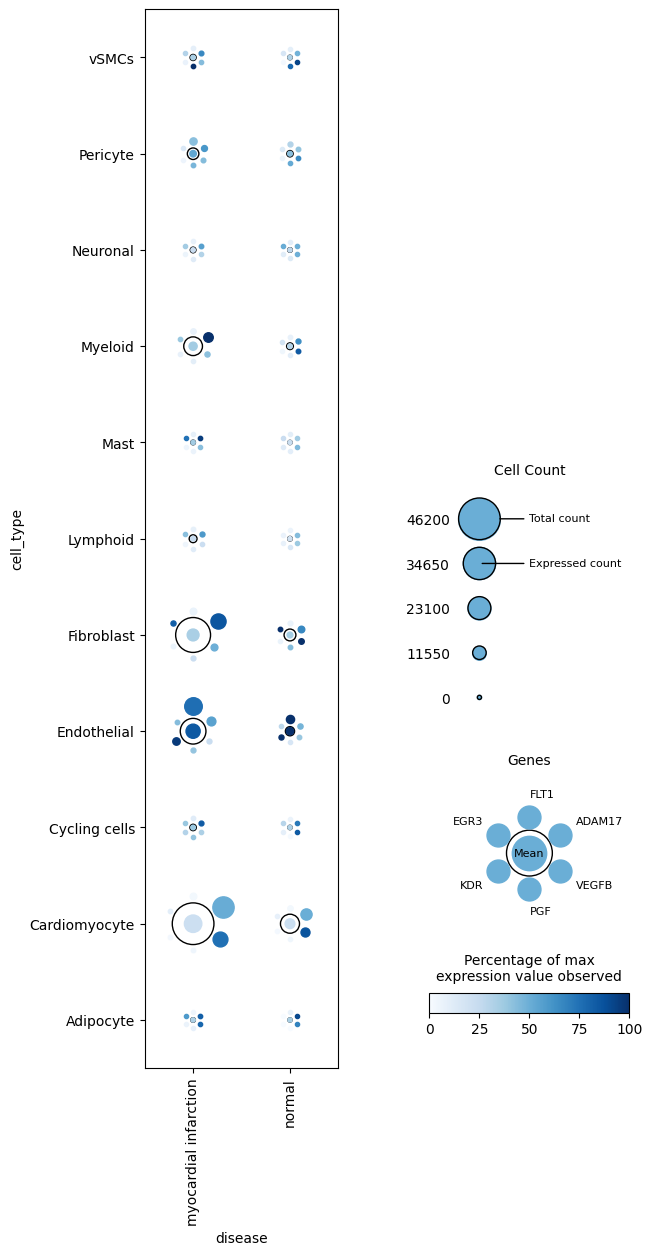

In [25]:
#plotting 

# Convert categories to numerical values for plotting
plot_vars['x_steps'] = plot_vars[x_col].astype('category').cat.codes
plot_vars['y_steps'] = plot_vars[y_col].astype('category').cat.codes

# Get unique categories for each annotation
x_categories = plot_vars[x_col].astype('category').cat.categories
y_categories = plot_vars[y_col].astype('category').cat.categories

# Create mappings from codes to original labels
# Note: The codes are integers from 0 to n_categories-1, directly usable as indices for the categories
x_labels = {code: label for code, label in enumerate(x_categories)}
y_labels = {code: label for code, label in enumerate(y_categories)}

#size in inches
if mode == 'planet':
    w, h = calculate_figure_size_planet(len(plot_vars['x_steps'].unique()), len(plot_vars['y_steps'].unique()), max_size, dot_scale)
if mode == 'mean':
    w, h = calculate_figure_size_mean(len(plot_vars['x_steps'].unique()), len(plot_vars['y_steps'].unique()), max_size, dot_scale)
height_per_unit = 1/h
width_per_unit = 1/w

# Plot main dots
fig, ax = plt.subplots(figsize=(w, h))

plt.xticks(ticks=range(len(x_categories)), labels=x_categories, rotation='vertical')
plt.yticks(ticks=range(len(y_categories)), labels=y_categories)

#size value condition
if size_value == 'count':
    ax.scatter(plot_vars['x_steps'], plot_vars['y_steps'], s=plot_vars['outer_size']**2, facecolors='none', edgecolors='0',linewidths=line_width)
if color_value == 'expression':
    sc = ax.scatter(plot_vars['x_steps'], plot_vars['y_steps'], s=plot_vars['inner_size']**2, c=plot_vars['mean_expression'], cmap='Blues', vmin=vmin, vmax=vmax)
if color_value == 'percentage_max_expression':
    sc = ax.scatter(plot_vars['x_steps'], plot_vars['y_steps'], s=plot_vars['inner_size']**2, c=plot_vars['percentage_max_expression'], cmap='Blues', vmin=0, vmax=100)

if mode == 'planet':
    for i, row in plot_vars.iterrows():
        p=0
        outer_size = row['outer_size']
        for gene in genes:
            size = row[gene+'_dot_size']
            size_factor = (3*line_width+ (outer_size+size)/2)*dot_scale
            offset_x = size_factor*planet_x[p]
            offset_y = size_factor*planet_y[p]
            secondary_x = row['x_steps'] + offset_x
            secondary_y = row['y_steps'] + offset_y
            if color_value == 'expression':
                ax.scatter(secondary_x, secondary_y, s=row[gene+'_dot_size']**2, c=row[gene+'_y'],cmap='Blues', vmin=vmin, vmax=vmax)
            if color_value == 'percentage_max_expression':
                ax.scatter(secondary_x, secondary_y, s=row[gene+'_dot_size']**2, c=row[gene+'_percentage_max_expression'],cmap='Blues', vmin=0, vmax=100)
            p=p+1
        
plt.xlim(-0.5,len(x_labels)-0.5)
plt.ylim(-0.5,len(y_labels)-0.5)
        
#color_legend
cbar_ax = fig.add_axes([1 + 0.33*legend_color_width*width_per_unit, 0.15, legend_color_width*width_per_unit, legend_color_height*height_per_unit])

cbar = plt.colorbar(sc, cax=cbar_ax, orientation='horizontal', fraction=0.046, pad=0.04)
if color_value == 'expression':
    cbar.set_label('Gene Expression', labelpad=-50)
if color_value == 'percentage_max_expression':
    cbar.set_label('Percentage of max\nexpression value observed', labelpad=-60)


#dots_legend
if mode == 'planet':
    dot_size_ax = fig.add_axes([1 + 0.33*legend_color_width*width_per_unit, 0.15+ 3*legend_color_height*height_per_unit+ 1.1*legend_planet_height*height_per_unit, legend_dot_width*width_per_unit, legend_dot_height*height_per_unit])
if mode == 'mean':
    dot_size_ax = fig.add_axes([1 + 0.33*legend_color_width*width_per_unit, 0.15+ 3*legend_color_height*height_per_unit, legend_dot_width*width_per_unit, legend_dot_height*height_per_unit])

sizes = np.linspace(min_size, max_size, num=5)

#size value condition
if size_value == 'percentage':
    labels = np.linspace(0, 100, num=5).astype(int)
if size_value == 'count':
    labels = np.linspace(min_global_cell_count, max_global_cell_count, num =5).astype(int)

for i in range(len(sizes)):
    #size value condition
    if size_value == 'percentage':
        dot_size_ax.scatter(0, i, s= sizes[i]**2, c='#6aaed6', alpha=1)
    if size_value == 'count':
        dot_size_ax.scatter(-0.25, i, s= sizes[i]**2, c='#6aaed6', alpha=1)
        dot_size_ax.scatter(-0.25, i, s=sizes[i]**2, facecolors='none', edgecolors='0',linewidths=line_width)
        if i == len(sizes)-1:
            dot_size_ax.annotate('Total count', 
                        xy=(-0.25 + dot_scale*sizes[i]/(1.5*np.pi), i), xycoords='data',
                        xytext=(-0.25 + 0.25, i), textcoords='data',
                        arrowprops=dict(arrowstyle="-", color="black", lw=line_width),
                        fontsize=8, ha='left', va='center')
        if i == len(sizes)-2:
            dot_size_ax.annotate('Expressed count', 
                        xy=(-0.25, i), xycoords='data',
                        xytext=(-0.25 + 0.25, i), textcoords='data',
                        arrowprops=dict(arrowstyle="-", color="black", lw=line_width),
                        fontsize=8, va = 'center')

for spine in dot_size_ax.spines.values():
    spine.set_visible(False)
dot_size_ax.set_xticks([])
dot_size_ax.set_xticklabels([])
dot_size_ax.set_yticks(range(len(sizes)))
dot_size_ax.set_yticklabels(labels)
dot_size_ax.margins(x=0, y=0.2)
dot_size_ax.set_xlim(-0.5, 0.5)
#size value condition
if size_value == 'count':
    dot_size_ax.tick_params(axis='y', which='major', pad=-15, length=0)
    dot_size_ax.set_title('Cell Count', fontsize=10)
if size_value == 'percentage':
    dot_size_ax.tick_params(axis='y', which='major', pad=-55, length=0)
    dot_size_ax.set_title('Percentage cells expressed', fontsize=10)
    

#planet legend
if mode == 'planet':
    dot_orientation_ax = fig.add_axes([1 + 0.33*legend_color_width*width_per_unit,0.15+ 3*legend_color_height*height_per_unit, legend_planet_width*width_per_unit, legend_planet_height*height_per_unit])
    size = (min_size+max_size)/2

    #size value condition
    if size_value == 'count':
        dot_orientation_ax.scatter(0, 0, s=(size*2)**2, facecolors='none', edgecolors='0',linewidths=line_width, alpha=1)

    dot_orientation_ax.scatter(0, 0, s=(size*1.5)**2, c='#6aaed6', alpha=1)
    dot_orientation_ax.text(0,0, 'Mean', fontsize=8, ha='center', va='center')

    p=0
    for gene in genes:
        size_factor = (line_width+size)*dot_scale
        offset_x = size_factor*planet_x[p]
        offset_y = size_factor*planet_y[p]
        secondary_x = offset_x
        secondary_y = offset_y
        dot_orientation_ax.scatter(secondary_x, secondary_y, s=size**2, c='#6aaed6', alpha=1)
        dot_orientation_ax.text(1.5*secondary_x, 1.5*secondary_y, gene, fontsize=8, **planet_text[p])
        p=p+1

    for spine in dot_orientation_ax.spines.values():
        spine.set_visible(False)


    # Remove tick marks and labels
    dot_orientation_ax.set_xticks([])
    dot_orientation_ax.set_yticks([])

    dot_orientation_ax.set_xlabel('')
    dot_orientation_ax.set_ylabel('')

    # Turn off tick labels
    dot_orientation_ax.set_xticklabels([])
    dot_orientation_ax.set_yticklabels([])

    dot_orientation_ax.margins(x=0.9, y=0.9)
    dot_orientation_ax.set_aspect('equal')
    dot_orientation_ax.set_title('Genes', fontsize=10, y=0.9)


ax.set_ylabel('cell_type')
ax.set_xlabel('disease')

In [26]:
plot_vars

,disease,cell_type_original,count,FLT1_x,EGR3_x,KDR_x,PGF_x,VEGFB_x,ADAM17_x,FLT1_y,...,outer_size,inner_size,FLT1_dot_size,EGR3_dot_size,KDR_dot_size,PGF_dot_size,VEGFB_dot_size,ADAM17_dot_size,x_steps,y_steps
0,myocardial infarction,Adipocyte,508,44,18,6,6,115,252,0.105173,...,3.296883,3.108329,3.025714,3.010519,3.003506,3.003506,3.067208,3.147273,0,0
1,myocardial infarction,Cardiomyocyte,46200,3031,304,431,364,13149,21074,0.061656,...,30.000000,12.559538,4.771364,3.177662,3.251883,3.212727,10.684481,15.315974,0,1
2,myocardial infarction,Cycling cells,2757,319,32,128,85,144,856,0.257742,...,4.611234,3.329305,3.186429,3.018701,3.074805,3.049675,3.084156,3.500260,0,2
3,myocardial infarction,Endothelial,26509,16511,377,4039,888,946,5697,1.717850,...,18.492273,10.192470,12.649286,3.220325,5.360455,3.518961,3.552857,6.329416,0,3
4,myocardial infarction,Fibroblast,37857,3075,1170,450,864,3300,13554,0.142909,...,25.124221,8.542749,4.797078,3.683766,3.262987,3.504935,4.928571,10.921169,0,4
5,myocardial infarction,Lymphoid,4537,413,56,35,40,143,982,0.195861,...,5.651494,3.407813,3.241364,3.032727,3.020455,3.023377,3.083571,3.573896,0,5
6,myocardial infarction,Mast,569,62,14,4,4,37,213,0.194918,...,3.332532,3.090887,3.036234,3.008182,3.002338,3.002338,3.021623,3.124481,0,6
7,myocardial infarction,Myeloid,17927,1553,229,220,146,1190,6601,0.173044,...,13.476818,5.864816,3.907597,3.133831,3.128571,3.085325,3.695455,6.857727,0,7
8,myocardial infarction,Neuronal,1860,161,22,20,20,89,416,0.170030,...,4.087013,3.168678,3.094091,3.012857,3.011688,3.011688,3.052013,3.243117,0,8
9,myocardial infarction,Pericyte,9083,3815,43,83,385,606,2142,0.960549,...,8.308247,4.685254,5.229545,3.025130,3.048506,3.225000,3.354156,4.251818,0,9
